In [ ]:
# 8.1
from numpy import arange
from matplotlib.pyplot import plot,show,xlabel,ylabel,legend

# Function to calculate the input voltage
def vin(t):
  if int(2*t)%2 == 0:
    return 1.0
  else:
    return -1.0

def lowPass(RC, N):
  tstart = 0.0
  tstop = 10.0
  
  def f(vout,t):
    return (vin(t) - vout)/RC

  h = (tstop - tstart)/N
  tpoints = arange(tstart,tstop,h)
  vpoints = []
  vout = 0.0
  for t in tpoints:
    vpoints.append(vout)
    k1 = h*f(vout,t)
    k2 = h*f(vout+0.5*k1,t+0.5*h)
    k3 = h*f(vout+0.5*k2,t+0.5*h)
    k4 = h*f(vout+k3,t+h)
    vout += (k1+2*k2+2*k3+k4)/6
  
  # Make plot
  plot(tpoints,vpoints,label=("RC="+str(RC)))
  xlabel("Time")
  ylabel("Voltage")
  legend()
  show()

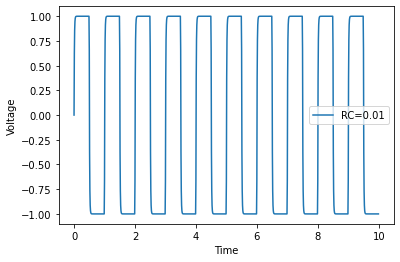

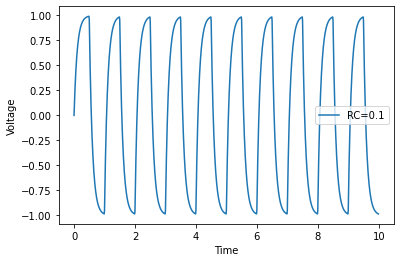

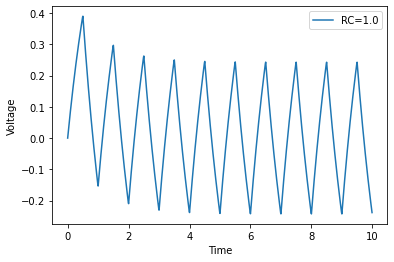

In [ ]:
lowPass(0.01,1000)
lowPass(0.1,1000)
lowPass(1.0,1000)
### When we pass the square wave through the low-pass iflter, the high-frequency components get cut off and the signal no longer has rapid variations, and the value of RC controls the cut-off

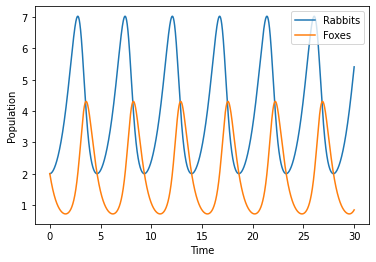

In [ ]:
# 8.2
from numpy import array,arange
from matplotlib.pyplot import plot,show,xlabel,ylabel,legend
alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 2.0
a = 0.0
b = 30.0
N = 10000
h = (b-a)/N
r = array([2,2],float)

def f(r,t):
  x = r[0]
  y = r[1]
  fx = alpha*x - beta*x*y
  fy = gamma*x*y - delta*y
  return array([fx,fy],float)

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

for t in tpoints:
  xpoints.append(r[0])
  ypoints.append(r[1])
  k1 = h*f(r,t)
  k2 = h*f(r+0.5*k1,t+0.5*h)
  k3 = h*f(r+0.5*k2,t+0.5*h)
  k4 = h*f(r+k3,t+h)
  r += (k1+2*k2+2*k3+k4)/6

# Both population oscillate with the same frequency, but there is a delay between the two
# When there are few foxes the rabbits proliferate because they are not being eaten
# Once there are many rabbits, the foxes gets lots of food and start to grow in number
# But a lot of foxes means that the rabbit population goes down, because they are eaten. 
# Once they go down in numebr too, the food supply shrinks and then the number of foxes shrink and the cycle restarts
plot(tpoints,xpoints,label="Rabbits")
plot(tpoints,ypoints,label="Foxes")
xlabel("Time")
ylabel("Population")
legend()
show()


In [ ]:
# 8.6
# First define our three functions

def fvanderpol(omega,mu,r,t):
  x = r[0]  
  v = r[1]
  fx = v
  fv = -omega*omega*x + mu*(1-x*x)*v
  return array([fx,fv],float)

def fharmonic(omega,mu,r,t):
  x = r[0]  
  v = r[1]
  fx = v
  fv = -omega*omega*x
  return array([fx,fv],float)

def fanharmonic(omega,mu,r,t):
  x = r[0]  
  v = r[1]
  fx = v
  fv = -omega*omega*x*x*x
  return array([fx,fv],float)

In [ ]:
from numpy import array,arange
from matplotlib.pyplot import plot,show,xlabel,ylabel,legend

# Code to run them all used below
def run(f,omega,mu,xi):
  # These are fixed
  a = 0.0
  b = 50.0
  N = 10000
  h = (b-a)/N

  # Initial values (fixed)
  x = xi
  v = 0.0
  r = array([x,v],float)

  # Lists for making plots
  tpoints = arange(a,b,h)
  xpoints = []
  vpoints = []

  # Main loop
  for t in tpoints:
    xpoints.append(r[0])
    vpoints.append(r[1])
    k1 = h*f(omega,mu,r,t)
    k2 = h*f(omega,mu,r+0.5*k1,t+0.5*h)
    k3 = h*f(omega,mu,r+0.5*k2,t+0.5*h)
    k4 = h*f(omega,mu,r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

  # Make the plots
  plot(tpoints,xpoints)
  xlabel("time")
  ylabel("x")
  show()

  plot(xpoints,vpoints)
  xlabel("x")
  ylabel("dx/dt")
  show()


Harmonic oscillator, xi = 1


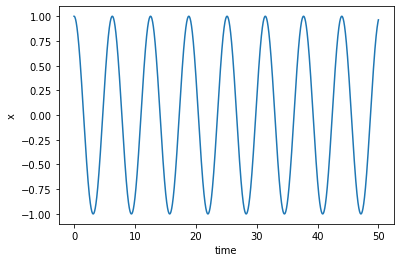

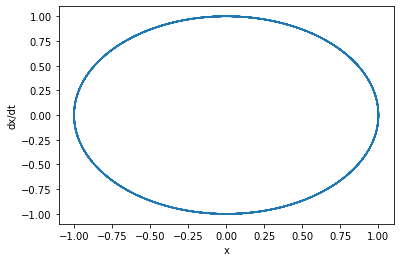

Harmonic oscillator, xi = 2


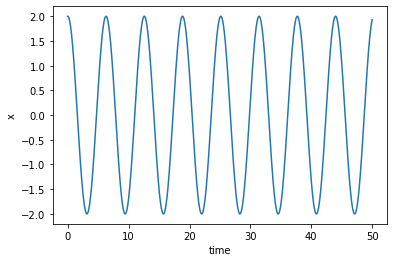

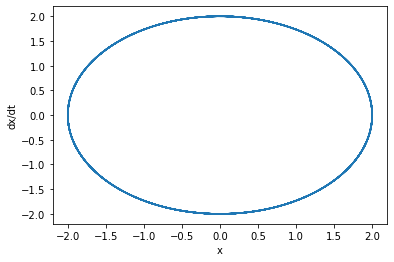

anHarmonic oscillator, xi = 1


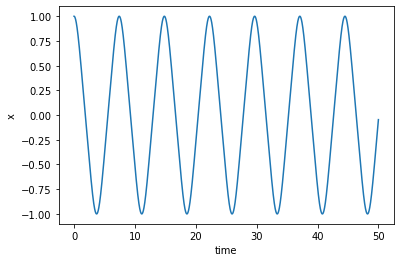

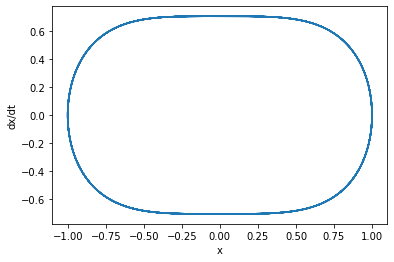

anHarmonic oscillator, xi = 2


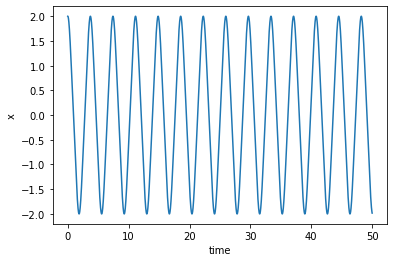

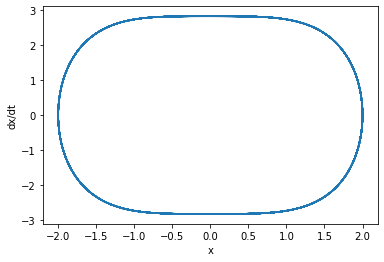

anHarmonic oscillator, xi = 0.5


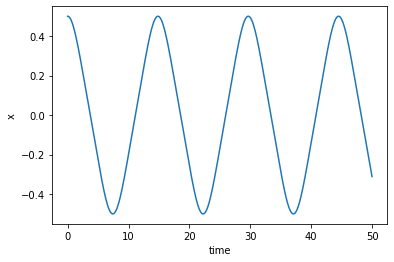

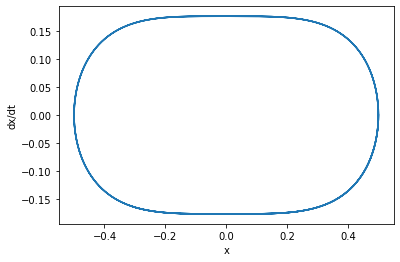

van der Pol oscillator, omega = mu = 1


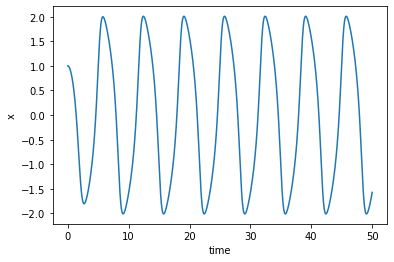

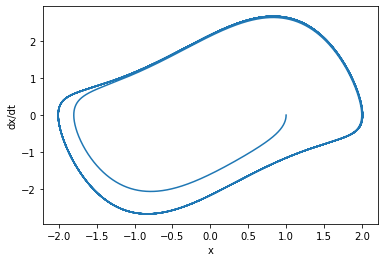

van der Pol oscillator, omega = 2, mu = 4


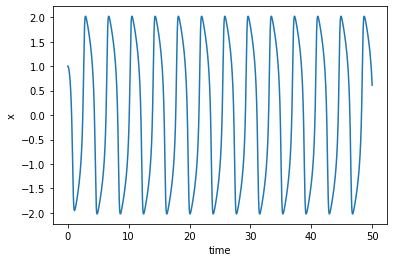

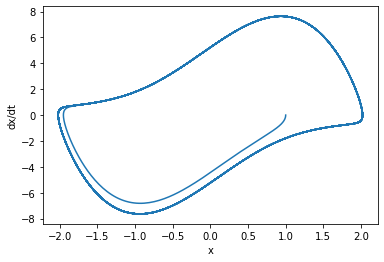

In [ ]:
# Run the above!
print("Harmonic oscillator, xi = 1")
run(fharmonic,1,0,1.0)
# period here stays the same!
print("Harmonic oscillator, xi = 2")

# here now we will see that the period doesn't stay the same
run(fharmonic,1,0,2.0)
print("anHarmonic oscillator, xi = 1")
run(fanharmonic,1,0,1.0)
print("anHarmonic oscillator, xi = 2")
run(fanharmonic,1,0,2.0)
print("anHarmonic oscillator, xi = 0.5")


run(fanharmonic,1,0,0.5)
print("van der Pol oscillator, omega = mu = 1")
run(fvanderpol,1.0,1.0,1)
print("van der Pol oscillator, omega = 2, mu = 4")
run(fvanderpol,2.0,4.0,1)



Exercise 8.7
The air resistance is in the opposite direction to the motion, ie in the direction of the unit vector $-\textbf{v}/v$. Thus the vector force is $\textbf{F} = -\frac{1}{2}\pi R^2 \rho C v^2 \frac{\textbf{v}}{v} = -\frac{1}{2}\pi R^2 \rho C v \textbf{v}$

From Newton's second law:

$m \ddot{x} = -\frac{1}{2}\pi R^2 \rho C v v_x = -\frac{1}{2}\pi R^2 \rho C \sqrt{\dot{x}^2 + \dot{y}^2} \dot{x}$

$m \ddot{y} = -mg -\frac{1}{2}\pi R^2 \rho C v v_y = -mg -\frac{1}{2}\pi R^2 \rho C \sqrt{\dot{x}^2 + \dot{y}^2} \dot{y}$

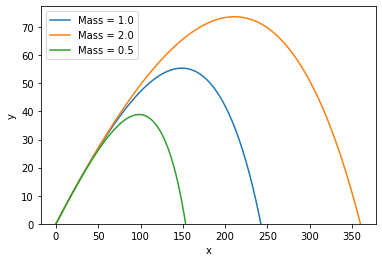

In [ ]:
# 8.7

from numpy import array,sqrt,sin,cos,pi
from matplotlib.pyplot import plot,show,ylim,legend,xlabel,ylabel

# Constants
g = 9.81
rho = 1.22
C = 0.47
R = 0.08
h = 0.001
theta = 30.0*pi/180
v0 = 100.0

def Run(m):
  const = (rho*C*pi*R*R)/(2*m)
  def f(r):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx
    fy = vy
    fvx = -const*vx*sqrt(vx*vx+vy*vy)
    fvy = -const*vy*sqrt(vx*vx+vy*vy) - g
    return array([fx,fy,fvx,fvy],float)

  # Main program for this mass
  r = array([0.0,0.0,v0*cos(theta),v0*sin(theta)])
  xpoints = []
  ypoints = []

  # Main loop
  while r[1] >= 0.0:
    k1 = h*f(r)
    k2 = h*f(r+0.5*k1)
    k3 = h*f(r+0.5*k2)
    k4 = h*f(r+k3)
    r += (k1+2*k2+2*k3+k4)/6
    xpoints.append(r[0])
    ypoints.append(r[1])

  plot(xpoints,ypoints,label=("Mass = %.1f"%m))

# Can see that more massive objects travel further!
Run(1.0)
Run(2.0)
Run(0.5)
xlabel("x")
ylabel("y")
ylim(0.0)
legend()
show()


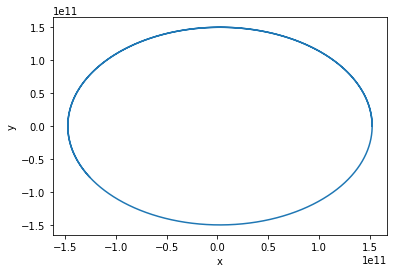

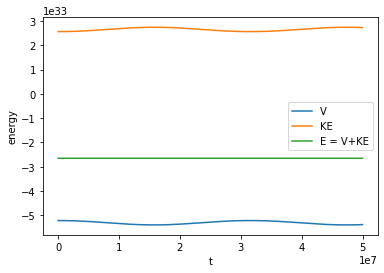

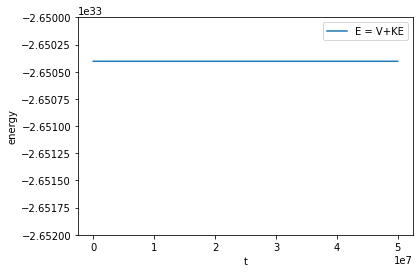

In [ ]:
# 8.12
from numpy import array,sqrt,sin,cos,pi,arange
from matplotlib.pyplot import plot,show,ylim,legend,xlabel,ylabel

# Constants
G = 6.6738e-11
M = 1.9891e30 # mass of the sun
m = 5.9722e24 # mass o the earth
x0 = 1.5210e11
y0 = 0.0
vx0 = 0.0
vy0 = 2.9291e4

a = 0.0
b = 50e6
h = 3600 # 1 hour in seconds

# Mag of a vector
def mag(r):
  return sqrt(sum(r*r))

def f(r):
  return -G*M*r/(mag(r)**3)

# Potential energy
def V(r):
  return -G*M*m/mag(r)

# Kinetic energy
def T(v):
  return 0.5*m*sum(v*v)

# Initial values
r = array([x0,y0],float)
v = array([vx0,vy0],float)
vhalf = v+0.5*h*f(r)

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
Vpoints = []
Tpoints = []
Epoints = []

# Main loop

for t in tpoints:
  xpoints.append(r[0])
  ypoints.append(r[1])
  Vpoints.append(V(r))
  Tpoints.append(T(v))
  Epoints.append(V(r) + T(v))
  r += h*vhalf
  k = h*f(r)
  v = vhalf + 0.5*k
  vhalf += k

#Plots

plot(xpoints,ypoints)
xlabel("x")
ylabel("y")
show()

plot(tpoints,Vpoints,label="V")
plot(tpoints,Tpoints,label="KE")
plot(tpoints,Epoints,label="E = V+KE")
xlabel("t")
ylabel("energy")
legend()
show()

# looks constant!
plot(tpoints,Epoints,label="E = V+KE")
xlabel("t")
ylabel("energy")
ylim(-2.652e33,-2.650e33)
legend()
show()

In [48]:
### Knuckleballs!
from math import sqrt,radians,exp,cos,sin
from numpy import array
from pylab import plot,show,xlabel,ylabel,legend,title,figure

## +x direction is from mound towards homeplate
## +y direction is horizontal towards right handed hitter
## +z direction is up (opposite of gravity)
g = 9.8
d = 18.44 ### 60 ft + 6 inches = 18.44 m

## for magnus force
#B = 4.1e-4
B = 0

h = 2e-6

# needed for lateral force due to stitching
def G(phi):
  return 0.5*(sin(4*phi)-0.25*sin(8*phi)+0.08*sin(12*phi)-0.025*sin(16*phi))

# Function for 4th order RK
def f(r):
  x = r[0]
  y = r[1]
  z = r[2]
  phi = r[3]
  vx = r[4]
  vy = r[5]
  vz = r[6]
  vphi = r[7]
  V = sqrt(vx*vx+vy*vy+vz*vz)
  fx = vx
  fy = vy
  fz = vz
  fphi = vphi
  fvx = -F(V)*V*vx 
  fvy = -F(V)*V*vy + g*G(phi)
  fvz = -g - F(V)*V*vz
  fvphi = 0
  return array([fx,fy,fz,fphi,fvx,fvy,fvz,fvphi],float)

def tossABall(v0,theta,omega,phi0):
  # Setup the starting values
  r = array([0,0,0,phi0,v0*cos(theta),0, v0*sin(theta),omega],float)
  xpoints = []
  ypoints = []
  zpoints = []

  t = 0.0
  while r[0] < d: ### while we haven't yet crossed the plate
    k1 = h*f(r)
    k2 = h*f(r+0.5*k1)
    k3 = h*f(r+0.5*k2)
    k4 = h*f(r+k3)
    r += (k1+2*k2+2*k3+k4)/6
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    t += h

  return xpoints,ypoints,zpoints

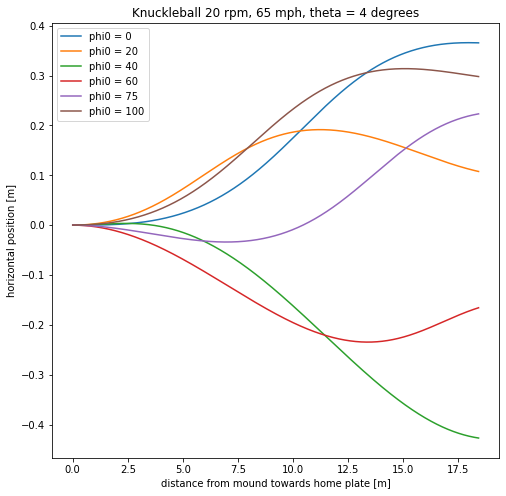

In [49]:
### knuckleball
v0 = 29.05 ## 29.05 m/s = 65 mph
theta = radians(4) ### 4 degree initial angle of elevation
omega = 2.09  ### 20 rpm = 2.09 radians/second
x0,y0,z0 = tossABall(v0,theta,omega,0) ### phi0 = 0
x1,y1,z1 = tossABall(v0,theta,omega,radians(20)) ### phi0 = 20
x2,y2,z2 = tossABall(v0,theta,omega,radians(40)) ### phi0 = 40
x3,y3,z3 = tossABall(v0,theta,omega,radians(60)) ### phi0 = 60
x4,y4,z4 = tossABall(v0,theta,omega,radians(75)) ### phi0 = 75  
x5,y5,z5 = tossABall(v0,theta,omega,radians(100)) ### phi0 = 100  
# Make plots
figure(figsize=(8,8))
plot(x0,y0,label="phi0 = 0")
plot(x1,y1,label="phi0 = 20")
plot(x2,y2,label="phi0 = 40")
plot(x3,y3,label="phi0 = 60")
plot(x4,y4,label="phi0 = 75")
plot(x5,y5,label="phi0 = 100")
xlabel("distance from mound towards home plate [m]")
ylabel("horizontal position [m]")
title("Knuckleball 20 rpm, 65 mph, theta = 4 degrees")
legend()
show()

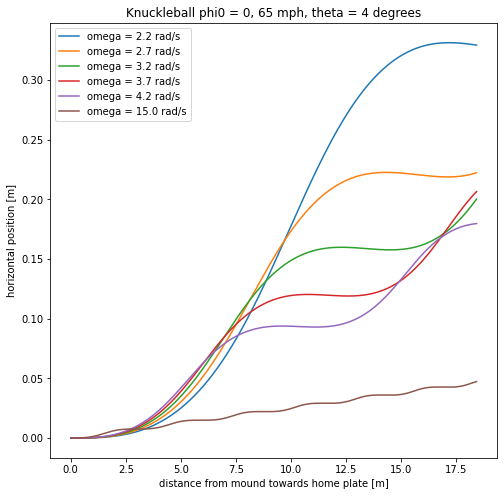

In [51]:
v0 = 29.05 ## 29.05 m/s = 65 mph
theta = radians(4) ### 4 degree initial angle of elevation
phi0 = 0
x0,y0,z0 = tossABall(v0,theta,2.2, phi0) ### 2.2 rad/s
x1,y1,z1 = tossABall(v0,theta,2.7, phi0) ### 2.7 rad/s
x2,y2,z2 = tossABall(v0,theta,3.2, phi0) ### 3.2 rad/s
x3,y3,z3 = tossABall(v0,theta,3.7, phi0) ### 3.7 rad/s
x4,y4,z4 = tossABall(v0,theta,4.2, phi0) ### 4.2 rad/s
x5,y5,z5 = tossABall(v0,theta,15.0, phi0) ### 15.0 rad/s
# Make plots
figure(figsize=(8,8))
plot(x0,y0,label="omega = 2.2 rad/s")
plot(x1,y1,label="omega = 2.7 rad/s")
plot(x2,y2,label="omega = 3.2 rad/s")
plot(x3,y3,label="omega = 3.7 rad/s")
plot(x4,y4,label="omega = 4.2 rad/s")
plot(x5,y5,label="omega = 15.0 rad/s")
xlabel("distance from mound towards home plate [m]")
ylabel("horizontal position [m]")
title("Knuckleball phi0 = 0, 65 mph, theta = 4 degrees")
legend()
show()